# **DDOS_MODEL**



## **Installing Libs**

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, f1_score


## **Read and Conacat**

In [ ]:
!unzip /content/drive/MyDrive/DATA/DTS/last.zip

Archive:  /content/drive/MyDrive/DATA/DTS/last.zip
  inflating: now.csv                 
  inflating: now_dos.csv             


In [ ]:
ddos = pd.read_csv('/content/now_dos.csv')
nrm = pd.read_csv('/content/now.csv')

In [ ]:
nrm.head()

,tp_src,tp_dst,protocol,ttl,opcode,pkt_len,flow_duration,flow_duration_sec,brodcast_cnt,packet_count,...,ethertype,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Cnt,ECE_Flag_Cnt,label
0,0,0,1,64,1,80,0.000000,0.000000,1,1,...,2054,0,0,0,0,0,0,0,0,0
1,0,0,1,64,1,80,0.003647,548.382559,2,2,...,2054,0,0,0,0,0,0,0,0,0
2,0,0,1,64,1,80,0.003866,776.004440,3,3,...,2054,0,0,0,0,0,0,0,0,0
3,0,0,1,64,1,80,0.005441,735.197897,4,4,...,2054,0,0,0,0,0,0,0,0,0
4,0,0,1,64,2,80,0.000000,0.000000,0,1,...,2054,0,0,0,0,0,0,0,0,0


In [ ]:
drp = ['opcode','brodcast_cnt']
ddos = ddos.drop(columns=drp)
nrm = nrm.drop(columns=drp)

In [ ]:
data = pd.concat([ddos, nrm], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
print("Combined :", data.shape)
print(data['label'].value_counts())

Combined : (1622924, 24)
label
0    1216087
1     406837
Name: count, dtype: int64


## **Train And Test**

In [ ]:
X = data.drop('label', axis=1)
y = data['label']
X = X.fillna(0)
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_tst_sc = scaler.transform(X_tst)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_tr, y_tr)

y_pred = model.predict(X_tst)

print(classification_report(y_tst, y_pred))

joblib.dump(model, "/content/drive/MyDrive/DATA/DTS/MEW_MOD.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/DATA/DTS/MEW_SC.pkl")

print("Model and scaler saved.")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    364998
           1       1.00      1.00      1.00    121880

    accuracy                           1.00    486878
   macro avg       1.00      1.00      1.00    486878
weighted avg       1.00      1.00      1.00    486878

Model and scaler saved.


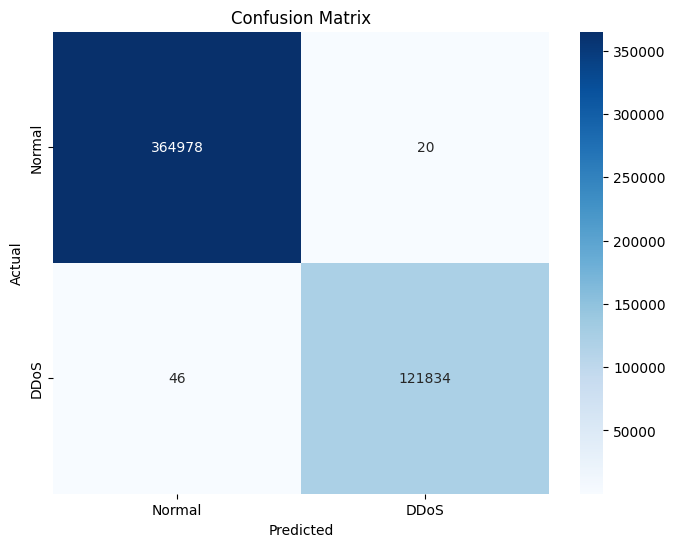

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
model = joblib.load("/content/drive/MyDrive/DATA/DTS/MEW_MOD.pkl")
scaler = joblib.load("/content/drive/MyDrive/DATA/DTS/MEW_SC.pkl")
X_tst_sc = scaler.transform(X_tst)
y_pred = model.predict(X_tst)
cm = confusion_matrix(y_tst, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# prompt: make me a readme.md file for this project


2. **Data Preparation:** Ensure the data files (`now_dos.csv`, `now.csv`) are available.  The script will concatenate these files before training.

3. **Run the script:** Execute the python script.  The script performs the following steps:
    - Loads and preprocesses the data.
    - Splits the data into training and testing sets.
    - Trains a RandomForestClassifier model.
    - Evaluates the model using classification metrics and a confusion matrix.
    - Saves the trained model and scaler to disk.


## Model Evaluation

The script generates a classification report and a confusion matrix to evaluate the model's performance. The metrics include:

* Precision
* Recall
* F1-score
* Accuracy
* Confusion matrix visualization

## Model Saving and Loading

The trained model and the StandardScaler used for feature scaling are saved using `joblib`.  The script also demonstrates loading the saved model and using it for prediction.

## Files

* **your_script_name.py:** The main Python script for training and evaluating the model.
* **now_dos.csv:** Data file for DDoS attacks.
* **now.csv:** Data file for normal traffic.
* **README.md:** This file.

## Future Improvements

*   Hyperparameter tuning: Explore different model parameters and optimization techniques for improved performance.
*   Feature Engineering: Investigate new features from the network traffic data that might improve the model's accuracy.
*   Alternative Models: Experiment with other machine learning algorithms to see if they yield better results.
